<a href="https://colab.research.google.com/github/matloob-altaf/Machine-Learning-LUMS/blob/main/Programming_Assignment_1/21100164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Datasets

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
import string
import re

In [5]:
#Load datasets
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-PA1/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-PA1/test.csv")

df_train.head(10)

,Sentiment,Tweet
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015,..."
1,negative,@united IT-problems with the link? #3thparty
2,positive,@united -today the staff @ MSP took customer s...
3,negative,@AmericanAir but have been yet to receive assi...
4,negative,@SouthwestAir you won't let me change my rese...
5,neutral,@AmericanAir where do I look for cabin crew va...
6,neutral,@united please update what is going to happen ...
7,negative,@AmericanAir how do I redeem a travel voucher ...
8,neutral,@AmericanAir originating at SFO and going to LAX.
9,negative,@JetBlue Good perspective. If only this safety...


In [6]:
print("Train data dimentions", df_train.shape)
print("Test data dimentions", df_test.shape)


Train data dimentions (11680, 2)
Test data dimentions (2921, 2)


## Preprocessing
*removing the stop words, punctuation marks and other unwanted characters from the tweets and converting them to lower case*

In [7]:
# Load stop words
stopWords = []
with open('/content/drive/My Drive/Colab Notebooks/ML-PA1/stop_words.txt', 'r') as fi:
    for line in fi:
        line = line.rstrip()
        stopWords.append(line)
stopWords += ["can't", 'cannot', 'could', "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i've", "let's", 'ought', "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", 'would', 'hey', 'hi']

print(stopWords)
print(len(stopWords))

['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 't

In [8]:

def removeUnwantedChars(tweet):
  # Removes urls
  result = re.sub(r'http\S+', '', tweet)
  # Removes the tweeter handle
  result = re.sub('(@)\w+', '', result)
  #  Converts to lower
  result = result.lower()
  # Removes stop words
  result = ' '.join(filter(lambda x: x not in stopWords,  result.split()))
  # Removes numbers
  result = re.sub(r'\d+', '', result)
  # Removes punctuactions
  result = re.sub(r'[^\w\s]','', result)
  # Removes leading and trailing white spaces
  result = result.strip()

  return result

In [9]:
df_train['preprocessedTweets'] = df_train['Tweet'].apply(removeUnwantedChars)
df_train.head()

,Sentiment,Tweet,preprocessedTweets
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015,...",amsterdam ewr
1,negative,@united IT-problems with the link? #3thparty,itproblems link thparty
2,positive,@united -today the staff @ MSP took customer s...,today staff msp took customer service new lev...
3,negative,@AmericanAir but have been yet to receive assi...,yet receive assistance one agents securing new...
4,negative,@SouthwestAir you won't let me change my rese...,let change reservation online wasting time


In [10]:
df_test['preprocessedTweets'] = df_test['Tweet'].apply(removeUnwantedChars)
df_test.head()

,Sentiment,Tweet,preprocessedTweets
0,neutral,@VirginAmerica to jump into the Dallas-Austin ...,jump dallasaustin market
1,positive,"@AmericanAir Chicago seen from seat 6A, AA 162...",chicago seen seat a aa far great ride pdx
2,negative,@united you need a bag bouncer. Get it together,need bag bouncer get together
3,negative,"@JetBlue Hey Jetblue, you stranded an entire p...",jetblue stranded entire plane supposed go jfk ...
4,negative,@USAirways Big fail on not having curbside bag...,big fail curbside baggage pittsburgh charge d...


## Feature Extraction
*representing each tweet as a bag-of-words (BoW), that is, an unordered set of words with their position ignored, keeping only their frequency in the tweet.*

In [11]:
def vectorize(tweet):
    vector=[]
    tokens = tweet.split()
    for w in vocabulary:
        vector.append(tokens.count(w))
    return np.asarray(vector)
def unique(tweet):
    tokens = tweet.split()
    for x in tokens:
      if not (x in vocabulary):
        vocabulary.append(x)

In [12]:
vocabulary = []
df_train['preprocessedTweets'].apply(unique)
print(vocabulary)

['amsterdam', 'ewr', 'itproblems', 'link', 'thparty', 'today', 'staff', 'msp', 'took', 'customer', 'service', 'new', 'level', 'father', 'passed', 'away', 'last', 'night', 'amp', 'helped', 'get', 'home', 'thanks', 'yet', 'receive', 'assistance', 'one', 'agents', 'securing', 'connection', 'many', 'miss', 'work', 'tomorrow', 'let', 'change', 'reservation', 'online', 'wasting', 'time', 'look', 'cabin', 'crew', 'vacancies', 'please', 'update', 'going', 'happen', 'passengers', 'flt', 'ua', 'cancelled', 'flightled', 'redeem', 'travel', 'voucher', 'flight', 'reach', 'agent', 'phone', 'hold', 'expires', 'hours', 'originating', 'sfo', 'lax', 'good', 'perspective', 'safety', 'concern', 'expressed', 'point', 'arrived', 'airport', 'communicationiskey', 'welllllll', 'rt', 'fleets', 'fleek', 'upgrades', 'paid', 'wifi', 'load', 'website', 'functionally', 'except', 'live', 'streaming', 'unacceptable', 'absolutely', 'worries', 'never', 'flying', 'again', 'ever', 'even', 'hitch', 'hike', 'cross', 'countr

In [13]:
len(vocabulary)

11106

## Part 1 - KNN from Scrach

In [14]:
X_train = df_train['preprocessedTweets'].apply(vectorize)

In [15]:
X_test = df_test['preprocessedTweets'].apply(vectorize)

In [16]:
# Transform categories to 1 for Neutral, 2 for Positive and 3 for Negative
def trans(sentiment):
  if sentiment == "neutral":
    return 1
  elif sentiment == "positive":
    return 2
  else:
    return 3

In [17]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)
Y_train = np.asarray(df_train['Sentiment'].apply(trans))
Y_test = np.asarray(df_test['Sentiment'].apply(trans))

In [18]:
X_train.shape

(11680, 11106)

In [19]:
# Calculates distances 
def distances(train, test):
    dists = np.zeros((test.shape[0], train.shape[0])) 
    dists = np.sqrt(- 2*np.dot(test, train.T) + np.sum(np.square(train), axis = 1) + np.sum(np.square(test), axis = 1)[:, np.newaxis])
    # dists = cdist(test, train, 'euclidean')
    return dists

In [20]:
# Predicts labels
def predictLabels(y_train, dists, k=1):

    y_pred = np.zeros(dists.shape[0])
    for i in range(dists.shape[0]):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      y_closest = []
    
      y_closest = y_train[np.argsort(dists[i])[:k]]
      y_pred[i] = np.argmax(np.bincount(y_closest))

    return y_pred

In [21]:
#Calculate distances
dists = distances(X_train, X_test)
print(dists)

[[2.23606798 2.44948974 4.89897949 ... 3.16227766 3.87298335 2.82842712]
 [3.31662479 3.46410162 5.47722558 ... 4.         4.58257569 3.74165739]
 [2.44948974 2.64575131 4.79583152 ... 3.31662479 4.         3.        ]
 ...
 [2.23606798 2.44948974 4.89897949 ... 3.16227766 3.87298335 2.82842712]
 [4.24264069 4.35889894 6.08276253 ... 4.79583152 5.29150262 4.58257569]
 [3.46410162 3.60555128 5.56776436 ... 4.12310563 4.69041576 3.87298335]]


In [22]:
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
	unique = set(actual)
	matrix = [list() for x in range(len(unique))]
	for i in range(len(unique)):
		matrix[i] = [0 for x in range(len(unique))]
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for i in range(len(actual)):
		x = lookup[actual[i]]
		y = lookup[predicted[i]]
		matrix[y][x] += 1
	return unique, matrix
# calculate precision, recall, and f1 score
def precision_recall_f1score(matrix, y_test):
  precision = []
  recall = []
  f1Score = []
  for i in range(len(matrix)):
    totalPositive = matrix[i][0] + matrix[i][1] + matrix[i][2]
    actualPositive = np.count_nonzero(y_test == (i+1))
    for j in range(len(matrix[0])):
      if i == j:
        precision.append(matrix[i][j]/totalPositive)
        recall.append(matrix[i][j]/actualPositive)
    # f1 Score
    f1Score.append(2* (precision[i]*recall[i])/(precision[i]+recall[i]))

  
  return precision, recall, f1Score


In [23]:
K = [1,3,5,7,10]
accuracies = []
precisions = []
recalls = []
f1scores = []
for k in K:
  Y_pred = predictLabels(Y_train, dists, k)
  accuracy = (float(np.sum(Y_pred == Y_test)) / Y_test.shape[0])*100
  unique, matrix = confusion_matrix(Y_test, Y_pred)
  prec, rec, f1Sco = precision_recall_f1score(matrix, Y_test)
  accuracies.append(accuracy)
  precisions.append(prec)
  recalls.append(rec)
  f1scores.append(f1Sco)
  # Print
  print("K = ", k)
  print('Accuracy: %f %%' % accuracy)
  print("Precision: ", np.average(prec))
  print("Recall:    ", np.average(rec))
  print("F1Score:   ", np.average(f1Sco))
  print("Confusion Matrix", matrix)

  print("_____________________________________________________________________________________________\n")

K =  1
Accuracy: 55.049641 %
Precision:  0.5657831124276101
Recall:     0.5835634386924429
F1Score:    0.538049668494044
Confusion Matrix [[417, 144, 768], [83, 269, 144], [115, 59, 922]]
_____________________________________________________________________________________________

K =  3
Accuracy: 51.318042 %
Precision:  0.5843364623353589
Recall:     0.5839266473408871
F1Score:    0.5220025878472204
Confusion Matrix [[473, 167, 952], [66, 269, 125], [76, 36, 757]]
_____________________________________________________________________________________________

K =  5
Accuracy: 48.955837 %
Precision:  0.5754437791084498
Recall:     0.5785589849272242
F1Score:    0.5012419886877612
Confusion Matrix [[490, 168, 1012], [77, 271, 153], [48, 33, 669]]
_____________________________________________________________________________________________

K =  7
Accuracy: 48.339610 %
Precision:  0.5778302320134684
Recall:     0.5823651747367149
F1Score:    0.4989069657408906
Confusion Matrix [[498, 157,

### Plots

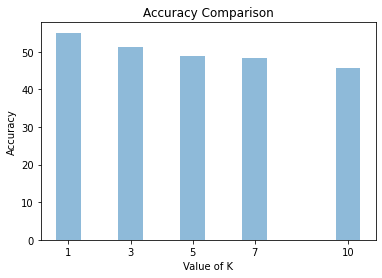

In [24]:
plt.bar(K, accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Accuracy')
plt.xlabel('Value of K')
plt.title('Accuracy Comparison')
plt.show()

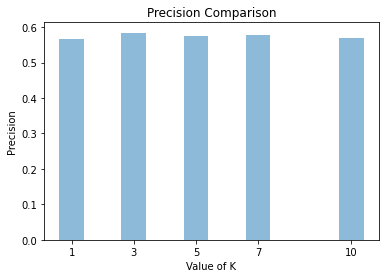

In [25]:
plt.bar(K, np.average(precisions, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Precision')
plt.xlabel('Value of K')
plt.title('Precision Comparison')

plt.show()

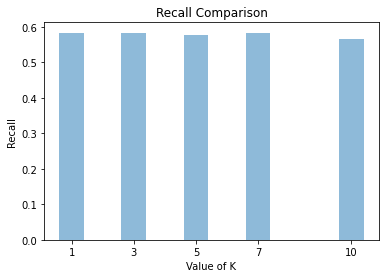

In [26]:
plt.bar(K, np.average(recalls, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Recall')
plt.xlabel('Value of K')
plt.title('Recall Comparison')

plt.show()

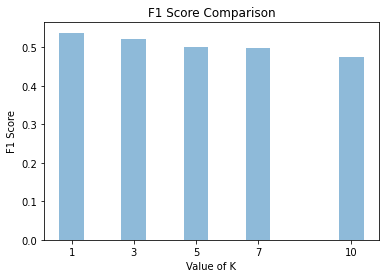

In [27]:
plt.bar(K, np.average(f1scores, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('F1 Score')
plt.xlabel('Value of K')
plt.title('F1 Score Comparison')

plt.show()

## Part 2 - scikit-learn’s kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [31]:
def KNN(k, x_train, x_test, y_train, y_test):
  #Setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)
  #Fit the model
  knn.fit(x_train, y_train)
  #Compute accuracy on the training set
  train_accuracy = knn.score(x_train, y_train)
  #Compute accuracy on the test set
  test_accuracy = knn.score(x_test, y_test) 
  #Make predictions
  y_pred = knn.predict(x_test)
  #Compute confusion matrix
  sk_matrix = multilabel_confusion_matrix(y_test, y_pred)
  #Compute Precision
  sk_prec = precision_score(y_test, y_pred, average='macro')
  #Compute recall
  sk_rec = recall_score(y_test, y_pred, average='macro')
  #Compute F1 Score
  sk_f1sco = f1_score(y_test, y_pred, average='macro')

  return train_accuracy, test_accuracy, sk_matrix, sk_prec, sk_rec, sk_f1sco

In [ ]:
K = [1,3,5,7,10]
# store computed data
train_accuracies =np.empty(len(K))
test_accuracies = np.empty(len(K))
sk_precisions = np.empty(len(K))
sk_recalls = np.empty(len(K))
sk_f1scores = np.empty(len(K))

for i ,k in enumerate(K):
    #Compute
    train_accuracies[i], test_accuracies[i], sk_matrix, sk_precisions[i], sk_recalls[i], sk_f1scores[i] = KNN(k ,X_train, X_test, Y_train, Y_test)

    print("K = ", k)
    print('Train Accuracy: %f %%' % train_accuracies[i])
    print('Test Accuracy: %f %%' % test_accuracies[i])
    print("Precision: ", sk_precisions[i])
    print("Recall:    ", sk_recalls[i])
    print("F1Score:   ", sk_f1scores[i])
    print("Confusion Matrix\n", sk_matrix)

    print("_____________________________________________________________________________________________\n")

K =  1
Train Accuracy: 0.990325 %
Test Accuracy: 0.530298 %
Precision:  0.5564757720721024
Recall:     0.5687029988518838
F1Score:    0.5191938206089574
Confusion Matrix [[[1328  978]
  [ 176  439]]

 [[2227  222]
  [ 226  246]]

 [[ 915  172]
  [ 970  864]]]
_____________________________________________________________________________________________

K =  3
Train Accuracy: 0.683990 %
Test Accuracy: 0.487162 %
Precision:  0.5791327869895343
Recall:     0.5679418978865315
F1Score:    0.49798604546325514
Confusion Matrix [[[1090 1216]
  [ 116  499]]

 [[2264  185]
  [ 225  247]]

 [[ 990   97]
  [1157  677]]]
_____________________________________________________________________________________________

K =  5
Train Accuracy: 0.604110 %
Test Accuracy: 0.466963 %
Precision:  0.5683871687412797
Recall:     0.5657423006313312
F1Score:    0.4831786082065757
Confusion Matrix [[[1057 1249]
  [ 120  495]]

 [[2221  228]
  [ 206  266]]

 [[1007   80]
  [1231  603]]]
_____________________________

### Plots

In [ ]:
#plot train accuracy
plt.bar(K, train_accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Train Accuracy')
plt.xlabel('Value of K')
plt.title('Train Accuracy Comparison')
plt.show()

In [ ]:
#plot test accuracy
plt.bar(K, test_accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Test Accuracy')
plt.xlabel('Value of K')
plt.title('Test Accuracy Comparison')
plt.show()

In [ ]:
#plot precisions
plt.bar(K, sk_precisions, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Precision')
plt.xlabel('Value of K')
plt.title('Precision Comparison')
plt.show()

In [ ]:
#plot recalls
plt.bar(K, sk_recalls, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Recall')
plt.xlabel('Value of K')
plt.title('Recall Comparison')
plt.show()

In [ ]:
#plot f1scores
plt.bar(K, sk_f1scores, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('F1 Score')
plt.xlabel('Value of K')
plt.title('F1 Score Comparison')
plt.show()

## Part 3 - Word2Vec

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
word2vec = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab Notebooks/ML-PA1/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [ ]:
type(word2vec)

In [ ]:
# Feature extractor
def extract_features(text):
  words = [word for word in text.split() if word in word2vec.vocab]
  if len(words) == 0:
    return np.asarray([])
  return np.asarray(np.mean(word2vec[words], axis=0))

In [ ]:
X_train = np.asarray(df_train['Tweet'].apply(extract_features))
X_test = np.asarray(df_test['Tweet'].apply(extract_features))

Y_train = np.asarray(df_train['Sentiment'].apply(trans))
Y_test = np.asarray(df_test['Sentiment'].apply(trans))

In [ ]:
print(X_train[21])

In [ ]:
# Removes empy entries
def cleanData(x, y):
  entriesToDelete = []
  for i in range(x.size):
    if x[i].size == 0:
      entriesToDelete.append(i)
  y = np.delete(y, entriesToDelete )
  x = np.delete(x, entriesToDelete )
  return x, y

In [ ]:
#Removing the entries for which there was no word in word2vec vocab
X_train, Y_train = cleanData(X_train, Y_train)
X_test, Y_test = cleanData(X_test, Y_test)   

In [ ]:
X_train = np.stack(X_train)
X_test  = np.stack(Y_train)

### Part 1 with Word2Vec

In [ ]:
#Calculate distances
dists = distances(X_train, X_test)
print(dists)

In [ ]:
K = [1,3,5,7,10]
accuracies = []
precisions = []
recalls = []
f1scores = []
for k in K:
  Y_pred = predictLabels(Y_train, dists, k)
  accuracy = (float(np.sum(Y_pred == Y_test)) / Y_test.shape[0])*100
  unique, matrix = confusion_matrix(Y_test, Y_pred)
  prec, rec, f1Sco = precision_recall_f1score(matrix, Y_test)
  accuracies.append(accuracy)
  precisions.append(prec)
  recalls.append(rec)
  f1scores.append(f1Sco)
  # Print
  print("Word2Vec Implementation")
  print("K = ", k)
  print('Accuracy: %f %%' % accuracy)
  print("Precision: ", np.average(prec))
  print("Recall:    ", np.average(rec))
  print("F1Score:   ", np.average(f1Sco))
  print("Confusion Matrix", matrix)

  print("_____________________________________________________________________________________________\n")

#### Plots

In [ ]:
plt.bar(K, accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Accuracy')
plt.xlabel('Value of K')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
plt.bar(K, np.average(precisions, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Precision')
plt.xlabel('Value of K')
plt.title('Precision Comparison')

plt.show()

In [ ]:
plt.bar(K, np.average(recalls, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Recall')
plt.xlabel('Value of K')
plt.title('Recall Comparison')

plt.show()

In [ ]:
plt.bar(K, np.average(f1scores, axis=1), align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('F1 Score')
plt.xlabel('Value of K')
plt.title('F1 Score Comparison')

plt.show()

### Part 2 with Word2Vec

In [ ]:
K = [1,3,5,7,10]
# store computed data
train_accuracies =np.empty(len(K))
test_accuracies = np.empty(len(K))
sk_precisions = np.empty(len(K))
sk_recalls = np.empty(len(K))
sk_f1scores = np.empty(len(K))

for i ,k in enumerate(K):
    #Compute
    train_accuracies[i], test_accuracies[i], sk_matrix, sk_precisions[i], sk_recalls[i], sk_f1scores[i] = KNN(k ,X_train, X_test, Y_train, Y_test)

    print("K = ", k)
    print('Train Accuracy: %f %%' % train_accuracies[i])
    print('Test Accuracy: %f %%' % test_accuracies[i])
    print("Precision: ", sk_precisions[i])
    print("Recall:    ", sk_recalls[i])
    print("F1Score:   ", sk_f1scores[i])
    print("Confusion Matrix", sk_matrix)

    print("_____________________________________________________________________________________________\n")

#### Plots

In [ ]:
#plot train accuracy
plt.bar(K, train_accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Train Accuracy')
plt.xlabel('Value of K')
plt.title('Train Accuracy Comparison')
plt.show()

In [ ]:
#plot test accuracy
plt.bar(K, test_accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Test Accuracy')
plt.xlabel('Value of K')
plt.title('Test Accuracy Comparison')
plt.show()

In [ ]:
#plot precisions
plt.bar(K, sk_precisions, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Precision')
plt.xlabel('Value of K')
plt.title('Precision Comparison')
plt.show()

In [ ]:
#plot recalls
plt.bar(K, sk_recalls, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Recall')
plt.xlabel('Value of K')
plt.title('Recall Comparison')
plt.show()

In [ ]:
#plot f1scores
plt.bar(K, sk_f1scores, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('F1 Score')
plt.xlabel('Value of K')
plt.title('F1 Score Comparison')
plt.show()